C:\Users\Dom\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
import numpy as np
import pandas as pd
import time
import sklearn


readdata = pd.read_csv("C:/Users/Dom/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)


# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
    elif classification[i] == 2:
        data_colour.append("b")
    elif classification[i] == 3:
        data_colour.append("g")
        
# Normalizes the data        
for i in range(0, np.shape(data)[0]):
    data[i,:] = (data[i,:] / np.ndarray.max(data[i,:])) * 2 - 1
    
        


#VARIABLES
stepSize = 0.01
nSteps = 10000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(1, 2, d, theta[1,2])
    i = 1
    j = 2
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==1 and j==2:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData, tBeta


tData, tBeta = GrandTour(data, nSteps)


In [2]:
import tensorflow as tf
import tensorflow.keras as keras

C:\Users\Dom\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
targetData = np.zeros((len(tData[0][0]), 3))
for counter, i in enumerate(classification):
    targetData[counter][int(i-1)] = 1
targetData

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
import time

accuracy = []

start = time.clock()

for i in range(999):

    if i % 10 == 0:
        print(time.clock() - start)
        print("!!!!!!!!!  " + str(i) + "  !!!!!!!!")
        
    if i % 3 == 0:
        continue

    xData = tData[i][0]
    yData = tData[i][1]
    trainingData = np.vstack((xData, yData)).T
    # NN model code
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    nnet = model.fit(trainingData, targetData, epochs=2, validation_split=0.2)
    accuracy.append(np.mean(nnet.history["acc"]))
    
print(accuracy)

0.00016483169844860868
!!!!!!!!!  0  !!!!!!!!
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 1s 4ms/step - loss: 1.0805 - acc: 0.4155 - val_loss: 1.2802 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 77us/step - loss: 1.0710 - acc: 0.4155 - val_loss: 1.3020 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 1s 4ms/step - loss: 1.0249 - acc: 0.4296 - val_loss: 1.2984 - val_acc: 0.0833
Epoch 2/2
142/142 [==============================] - 0s 56us/step - loss: 0.9953 - acc: 0.4155 - val_loss: 1.3973 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 1s 4ms/step - loss: 1.0936 - acc: 0.4014 - val_loss: 1.0918 - val_acc: 0.5556
Epoch 2/2
142/142 [==============================] - 0s 49us/step - loss: 1.0792 - acc: 0.4014 - val_loss: 1.1419 - val_acc: 0.0000e+00
Train on 142 s

Epoch 2/2
142/142 [==============================] - 0s 75us/step - loss: 1.0728 - acc: 0.4930 - val_loss: 1.1627 - val_acc: 0.0000e+00
53.82614668343671
!!!!!!!!!  40  !!!!!!!!
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 2s 13ms/step - loss: 1.1023 - acc: 0.5000 - val_loss: 1.1249 - val_acc: 0.0556
Epoch 2/2
142/142 [==============================] - 0s 127us/step - loss: 1.0728 - acc: 0.4930 - val_loss: 1.1673 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 2s 14ms/step - loss: 1.0094 - acc: 0.4930 - val_loss: 1.2922 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 119us/step - loss: 0.9944 - acc: 0.4930 - val_loss: 1.3356 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 2s 15ms/step - loss: 1.0987 - acc: 0.4366 - val_loss: 1.1605 - val_acc: 0.0000e+00
Epoch 2/2

142/142 [==============================] - 4s 26ms/step - loss: 1.0678 - acc: 0.4930 - val_loss: 1.0876 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 106us/step - loss: 1.0497 - acc: 0.5000 - val_loss: 1.1213 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 4s 27ms/step - loss: 1.0995 - acc: 0.3239 - val_loss: 1.2049 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 116us/step - loss: 1.0820 - acc: 0.3662 - val_loss: 1.2209 - val_acc: 0.0000e+00
154.7417116459065
!!!!!!!!!  80  !!!!!!!!
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 4s 28ms/step - loss: 1.0719 - acc: 0.5211 - val_loss: 1.1181 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 112us/step - loss: 1.0573 - acc: 0.5282 - val_loss: 1.1336 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/

142/142 [==============================] - 0s 155us/step - loss: 1.1120 - acc: 0.1408 - val_loss: 1.1973 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 5s 38ms/step - loss: 1.0933 - acc: 0.3592 - val_loss: 1.0519 - val_acc: 0.8611
Epoch 2/2
142/142 [==============================] - 0s 166us/step - loss: 1.0787 - acc: 0.6056 - val_loss: 1.0530 - val_acc: 0.7222
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 6s 42ms/step - loss: 1.0697 - acc: 0.7324 - val_loss: 1.1572 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 162us/step - loss: 1.0517 - acc: 0.7676 - val_loss: 1.1639 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 6s 42ms/step - loss: 1.0879 - acc: 0.6197 - val_loss: 1.0436 - val_acc: 0.8056
Epoch 2/2
142/142 [==============================] - 0s 145us/step -

142/142 [==============================] - 7s 52ms/step - loss: 1.0099 - acc: 0.5070 - val_loss: 1.1209 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 195us/step - loss: 0.9966 - acc: 0.5352 - val_loss: 1.1327 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 8s 56ms/step - loss: 1.0837 - acc: 0.4859 - val_loss: 1.0732 - val_acc: 0.3333
Epoch 2/2
142/142 [==============================] - 0s 176us/step - loss: 1.0714 - acc: 0.5352 - val_loss: 1.0808 - val_acc: 0.2778
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 8s 57ms/step - loss: 1.1579 - acc: 0.1761 - val_loss: 1.0587 - val_acc: 0.7500
Epoch 2/2
142/142 [==============================] - 0s 190us/step - loss: 1.1361 - acc: 0.2465 - val_loss: 1.0743 - val_acc: 0.6667
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 8s 54ms/step - loss

142/142 [==============================] - 0s 169us/step - loss: 1.0676 - acc: 0.4225 - val_loss: 1.1463 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 10s 72ms/step - loss: 1.1207 - acc: 0.4085 - val_loss: 1.1384 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 288us/step - loss: 1.1004 - acc: 0.4859 - val_loss: 1.1453 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 10s 70ms/step - loss: 1.1235 - acc: 0.2254 - val_loss: 1.0479 - val_acc: 0.9722
Epoch 2/2
142/142 [==============================] - 0s 218us/step - loss: 1.1077 - acc: 0.3732 - val_loss: 1.0544 - val_acc: 0.9444
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 10s 70ms/step - loss: 1.0881 - acc: 0.4507 - val_loss: 1.1714 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 197us

142/142 [==============================] - 14s 97ms/step - loss: 1.0982 - acc: 0.3028 - val_loss: 1.2470 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 400us/step - loss: 1.0751 - acc: 0.4859 - val_loss: 1.2662 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 14s 98ms/step - loss: 1.0568 - acc: 0.5070 - val_loss: 1.1094 - val_acc: 0.0833
Epoch 2/2
142/142 [==============================] - 0s 239us/step - loss: 1.0335 - acc: 0.6338 - val_loss: 1.1346 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 14s 99ms/step - loss: 1.0825 - acc: 0.5000 - val_loss: 1.1315 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 261us/step - loss: 1.0639 - acc: 0.5141 - val_loss: 1.1548 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 14s 

142/142 [==============================] - 0s 288us/step - loss: 1.0045 - acc: 0.5000 - val_loss: 1.2451 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 17s 120ms/step - loss: 1.1080 - acc: 0.0845 - val_loss: 1.0441 - val_acc: 0.8333
Epoch 2/2
142/142 [==============================] - 0s 309us/step - loss: 1.0849 - acc: 0.3028 - val_loss: 1.0606 - val_acc: 0.4444
1472.06538749489
!!!!!!!!!  270  !!!!!!!!
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 17s 122ms/step - loss: 1.1672 - acc: 0.1479 - val_loss: 1.0788 - val_acc: 0.4167
Epoch 2/2
142/142 [==============================] - 0s 302us/step - loss: 1.1367 - acc: 0.2324 - val_loss: 1.0910 - val_acc: 0.3611
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 17s 121ms/step - loss: 1.1169 - acc: 0.0915 - val_loss: 1.0436 - val_acc: 1.0000
Epoch 2/2
142/142 [=========

142/142 [==============================] - 22s 158ms/step - loss: 1.0915 - acc: 0.4155 - val_loss: 1.1291 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 386us/step - loss: 1.0738 - acc: 0.4155 - val_loss: 1.1310 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 22s 153ms/step - loss: 1.1390 - acc: 0.0845 - val_loss: 1.0484 - val_acc: 0.7500
Epoch 2/2
142/142 [==============================] - 0s 422us/step - loss: 1.1206 - acc: 0.1197 - val_loss: 1.0541 - val_acc: 0.7222
2018.4103838864614
!!!!!!!!!  310  !!!!!!!!
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 23s 160ms/step - loss: 1.1284 - acc: 0.4155 - val_loss: 1.1388 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 448us/step - loss: 1.1011 - acc: 0.4085 - val_loss: 1.1510 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/

Epoch 2/2
142/142 [==============================] - 0s 344us/step - loss: 1.1716 - acc: 0.0634 - val_loss: 1.0498 - val_acc: 0.8889
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 14s 99ms/step - loss: 1.0371 - acc: 0.5000 - val_loss: 1.1690 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 323us/step - loss: 1.0183 - acc: 0.5000 - val_loss: 1.1753 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 15s 105ms/step - loss: 1.0847 - acc: 0.4859 - val_loss: 0.9516 - val_acc: 0.9167
Epoch 2/2
142/142 [==============================] - 0s 281us/step - loss: 1.0624 - acc: 0.4789 - val_loss: 0.9437 - val_acc: 0.9167
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 14s 101ms/step - loss: 1.0975 - acc: 0.4155 - val_loss: 1.2411 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 

142/142 [==============================] - 16s 115ms/step - loss: 1.1364 - acc: 0.0845 - val_loss: 0.8728 - val_acc: 1.0000
Epoch 2/2
142/142 [==============================] - 0s 351us/step - loss: 1.1117 - acc: 0.2394 - val_loss: 0.8620 - val_acc: 1.0000
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 17s 117ms/step - loss: 1.1186 - acc: 0.4155 - val_loss: 1.1467 - val_acc: 0.0833
Epoch 2/2
142/142 [==============================] - 0s 323us/step - loss: 1.1024 - acc: 0.4648 - val_loss: 1.1482 - val_acc: 0.1389
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 17s 119ms/step - loss: 1.0672 - acc: 0.4859 - val_loss: 1.1176 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 309us/step - loss: 1.0473 - acc: 0.4859 - val_loss: 1.1247 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 17s 119ms/ste

142/142 [==============================] - 0s 358us/step - loss: 1.0890 - acc: 0.5211 - val_loss: 1.1469 - val_acc: 0.0833
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 19s 136ms/step - loss: 1.1023 - acc: 0.3451 - val_loss: 1.0888 - val_acc: 0.3611
Epoch 2/2
142/142 [==============================] - 0s 414us/step - loss: 1.0865 - acc: 0.4296 - val_loss: 1.0969 - val_acc: 0.3611
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 20s 139ms/step - loss: 1.0730 - acc: 0.4155 - val_loss: 1.1796 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 407us/step - loss: 1.0565 - acc: 0.4085 - val_loss: 1.1884 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 20s 139ms/step - loss: 1.1258 - acc: 0.1831 - val_loss: 1.0956 - val_acc: 0.0278
Epoch 2/2
142/142 [==============================] - 0s 435us/step

142/142 [==============================] - 22s 157ms/step - loss: 1.0809 - acc: 0.4085 - val_loss: 1.0522 - val_acc: 0.7500
Epoch 2/2
142/142 [==============================] - 0s 463us/step - loss: 1.0633 - acc: 0.4225 - val_loss: 1.0593 - val_acc: 0.6944
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 23s 159ms/step - loss: 1.1581 - acc: 0.1690 - val_loss: 1.0668 - val_acc: 0.7500
Epoch 2/2
142/142 [==============================] - 0s 484us/step - loss: 1.1391 - acc: 0.2113 - val_loss: 1.0756 - val_acc: 0.5833
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 23s 161ms/step - loss: 1.0857 - acc: 0.4155 - val_loss: 1.1344 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 393us/step - loss: 1.0687 - acc: 0.5493 - val_loss: 1.1412 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 23s 160ms/ste

142/142 [==============================] - 0s 499us/step - loss: 1.1371 - acc: 0.0634 - val_loss: 1.1175 - val_acc: 0.0556
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 26s 181ms/step - loss: 1.0175 - acc: 0.4718 - val_loss: 1.1751 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 505us/step - loss: 0.9973 - acc: 0.5211 - val_loss: 1.1920 - val_acc: 0.0000e+00
5446.26865050611
!!!!!!!!!  500  !!!!!!!!
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 26s 184ms/step - loss: 1.0679 - acc: 0.4718 - val_loss: 1.1118 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 492us/step - loss: 1.0461 - acc: 0.5493 - val_loss: 1.1282 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 27s 187ms/step - loss: 1.0987 - acc: 0.1338 - val_loss: 1.0711 - val_acc: 0.3611
Epoch 2/2
142/14

Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 31s 216ms/step - loss: 1.0825 - acc: 0.5000 - val_loss: 1.2160 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 555us/step - loss: 1.0555 - acc: 0.6338 - val_loss: 1.2314 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 31s 221ms/step - loss: 1.1865 - acc: 0.0845 - val_loss: 1.0148 - val_acc: 1.0000
Epoch 2/2
142/142 [==============================] - 0s 555us/step - loss: 1.1567 - acc: 0.0986 - val_loss: 1.0215 - val_acc: 1.0000
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 31s 219ms/step - loss: 1.1191 - acc: 0.2535 - val_loss: 0.9643 - val_acc: 1.0000
Epoch 2/2
142/142 [==============================] - 0s 534us/step - loss: 1.0944 - acc: 0.5704 - val_loss: 0.9474 - val_acc: 1.0000
6247.1353946534
!!!!!!!!!  540  !!!!!!!!
Train on 142 sa

142/142 [==============================] - 57s 403ms/step - loss: 1.1460 - acc: 0.0915 - val_loss: 0.8879 - val_acc: 1.0000
Epoch 2/2
142/142 [==============================] - 0s 1ms/step - loss: 1.1196 - acc: 0.1338 - val_loss: 0.8916 - val_acc: 1.0000
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 59s 418ms/step - loss: 1.1023 - acc: 0.2958 - val_loss: 1.0677 - val_acc: 0.9167
Epoch 2/2
142/142 [==============================] - 0s 924us/step - loss: 1.0831 - acc: 0.4507 - val_loss: 1.0751 - val_acc: 0.8333
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 57s 399ms/step - loss: 1.1271 - acc: 0.5070 - val_loss: 1.0434 - val_acc: 0.6944
Epoch 2/2
142/142 [==============================] - 0s 836us/step - loss: 1.1067 - acc: 0.5141 - val_loss: 1.0455 - val_acc: 0.5278
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 58s 409ms/step - loss: 

142/142 [==============================] - 0s 952us/step - loss: 1.0224 - acc: 0.7958 - val_loss: 1.1821 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 64s 449ms/step - loss: 1.0801 - acc: 0.5000 - val_loss: 1.1478 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 1ms/step - loss: 1.0589 - acc: 0.6127 - val_loss: 1.1704 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 64s 448ms/step - loss: 1.0482 - acc: 0.4930 - val_loss: 1.1680 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 2ms/step - loss: 1.0213 - acc: 0.5000 - val_loss: 1.1974 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 66s 463ms/step - loss: 1.0625 - acc: 0.4930 - val_loss: 1.0682 - val_acc: 0.5556
Epoch 2/2
142/142 [==============================] - 0s 1m

142/142 [==============================] - 75s 529ms/step - loss: 1.1018 - acc: 0.2817 - val_loss: 1.1015 - val_acc: 0.5833
Epoch 2/2
142/142 [==============================] - 0s 1ms/step - loss: 1.0855 - acc: 0.4930 - val_loss: 1.1197 - val_acc: 0.1389
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 76s 536ms/step - loss: 1.1214 - acc: 0.4296 - val_loss: 1.0766 - val_acc: 0.4444
Epoch 2/2
142/142 [==============================] - 0s 2ms/step - loss: 1.0976 - acc: 0.4789 - val_loss: 1.1021 - val_acc: 0.2222
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 76s 537ms/step - loss: 1.1197 - acc: 0.1056 - val_loss: 0.9589 - val_acc: 0.9167
Epoch 2/2
142/142 [==============================] - 0s 2ms/step - loss: 1.0882 - acc: 0.1690 - val_loss: 0.9854 - val_acc: 0.8611
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 77s 539ms/step - loss: 1.08

142/142 [==============================] - 0s 1ms/step - loss: 1.0885 - acc: 0.4437 - val_loss: 1.1909 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 82s 579ms/step - loss: 1.0988 - acc: 0.3803 - val_loss: 1.1738 - val_acc: 0.0556
Epoch 2/2
142/142 [==============================] - 0s 2ms/step - loss: 1.0817 - acc: 0.4930 - val_loss: 1.1897 - val_acc: 0.0556
31568.62904990936
!!!!!!!!!  690  !!!!!!!!
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 80s 566ms/step - loss: 1.0759 - acc: 0.3451 - val_loss: 0.9706 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==============================] - 0s 1ms/step - loss: 1.0607 - acc: 0.5070 - val_loss: 1.0043 - val_acc: 0.0000e+00
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 82s 575ms/step - loss: 1.0703 - acc: 0.4366 - val_loss: 1.4536 - val_acc: 0.0000e+00
Epoch 2/2
142/142 [==

In [135]:
accuracy

[0.0915492961943989,
 0.4225352129466097,
 0.3591549302070913,
 0.5845070426732721,
 0.3873239424027188,
 0.647887322264658,
 0.3556338032366524,
 0.4894366201380609,
 0.5000000014691286,
 0.6056338049156565]

12 0.7464788736591876


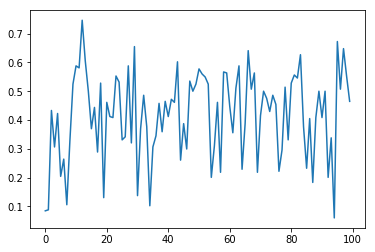

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(0, len(accuracy)))

new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")

max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)

In [123]:
# NN model code
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
abcd = model.fit(trainingData, targetData, epochs=100, validation_split=0.2)

abcd.history["acc"]


Train on 113 samples, validate on 29 samples
Epoch 1/100
113/113 [==============================] - 2s 13ms/step - loss: 1.1139 - acc: 0.3894 - val_loss: 1.1106 - val_acc: 0.3448
Epoch 2/100
113/113 [==============================] - 0s 88us/step - loss: 1.1048 - acc: 0.3628 - val_loss: 1.1020 - val_acc: 0.3448
Epoch 3/100
113/113 [==============================] - 0s 88us/step - loss: 1.0962 - acc: 0.3628 - val_loss: 1.0947 - val_acc: 0.3448
Epoch 4/100
113/113 [==============================] - 0s 97us/step - loss: 1.0903 - acc: 0.3628 - val_loss: 1.0901 - val_acc: 0.3448
Epoch 5/100
113/113 [==============================] - 0s 88us/step - loss: 1.0863 - acc: 0.3628 - val_loss: 1.0866 - val_acc: 0.3448
Epoch 6/100
113/113 [==============================] - 0s 88us/step - loss: 1.0829 - acc: 0.3628 - val_loss: 1.0832 - val_acc: 0.3448
Epoch 7/100
113/113 [==============================] - 0s 88us/step - loss: 1.0800 - acc: 0.3628 - val_loss: 1.0803 - val_acc: 0.3448
Epoch 8/100
113/1

[0.3893805317646634,
 0.36283185919829175,
 0.3628318602532412,
 0.3628318597257665,
 0.3628318602532412,
 0.362831858670817,
 0.3628318602532412,
 0.3628318602532412,
 0.36283185906642307,
 0.3628318597257665,
 0.3628318597257665,
 0.36283185853894834,
 0.3893805328196129,
 0.39823008915491864,
 0.3982300903417368,
 0.40707964733638596,
 0.407079650237497,
 0.4159292048585098,
 0.4159292048585098,
 0.41592920723214616,
 0.38938053519324917,
 0.3982300887593126,
 0.3982300887593126,
 0.4159292048585098,
 0.4159292043310351,
 0.42477876290810845,
 0.4336283187159395,
 0.4336283222763939,
 0.44247787742488154,
 0.44247787742488154,
 0.46017699194165457,
 0.4601769924691293,
 0.4601769924691293,
 0.44247788032599256,
 0.46017699141417984,
 0.46017699128231115,
 0.46017699194165457,
 0.46017699194165457,
 0.4601769953702403,
 0.46902654893630374,
 0.4690265528923642,
 0.46017699194165457,
 0.47787610645842765,
 0.48672566450802623,
 0.47787610645842765,
 0.48672566450802623,
 0.51327433839

In [ ]:
new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")



max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)